In [1]:
from brian2 import *
import brian2.numpy_ as np
import h5py
import time
import os
MNIST_TRAIN_HDF5_FILE = '../nest/HDF5_MNIST_TRAIN.h5'
MNIST_TEST_HDF5_FILE = '../nest/HDF5_MNIST_TEST.h5'

/opt/pyc/brian2env/lib/python3.5/site-packages/brian2/core/variables.py:174: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return np.issubdtype(np.bool, self.dtype)


In [130]:
from matplotlib import pyplot as plt

In [2]:
f = h5py.File("../nest/HDF5_MNIST_TRAIN.h5", 'r')
img = f["img"][:]
label = f["label"][:]
f.close()

In [10]:
IMG_SIZE = 784
bin_size = 2*ms
p = 1*Hz*bin_size  # Firing rate per neuron: 1Hz
total = 10*second  # Total length of our stimulus
pattern_length = 250*ms
repeat_every = pattern_length * 4
n_repetitions = int(total/repeat_every)

In [143]:
spikes = np.random.rand(IMG_SIZE, int(total / bin_size)) < p
pattern = np.zeros([IMG_SIZE,int(pattern_length / bin_size)])
img_flatten = np.array(img[0]).flatten()

In [144]:
rates = img_flatten / 255 * 255.0*Hz
inp = PoissonGroup(IMG_SIZE, rates)
spikeMonitor = SpikeMonitor(inp)
run(250*ms, report="text")
np.array(spikeMonitor.count).nonzero()[0].shape

Starting simulation at t=0. s for a duration of 250. ms
0.25 (100%) simulated in < 1s


(160,)

In [145]:
166 / 31

5.354838709677419

In [146]:
indices,times = spikeMonitor.it

In [147]:
spike_counts = spikeMonitor.count

In [148]:
for i in range(np.array(indices).shape[0]):
    pattern[indices[i]][int(times[i] / bin_size)] = True

In [149]:
for rep in np.arange(n_repetitions):
    spikes[:, rep*int(repeat_every/bin_size):rep*int(repeat_every/bin_size)+int(pattern_length/bin_size)] = pattern

In [150]:
indices, time_bins = spikes.nonzero()
times = time_bins * bin_size

(0, 1)

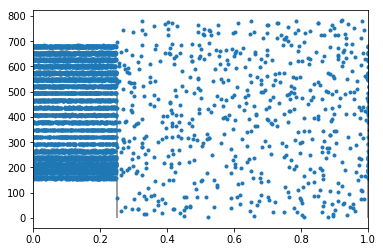

In [151]:
plt.plot(times/second, indices, '.')
# Add lines to show the repeated stimulation windows
plt.vlines(np.arange(n_repetitions)*repeat_every/second, 0, 500, color='gray')
plt.vlines(np.arange(n_repetitions)*repeat_every/second + pattern_length/second, 0, 500, color='gray')
plt.xlim(0,1)

<BarContainer object of 784 artists>

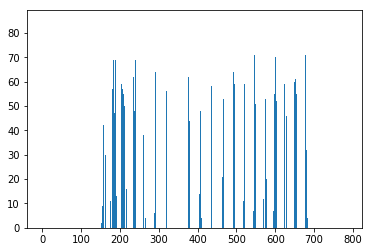

In [152]:
plt.bar(range(784),spike_counts)

In [124]:
np.array(indices).shape

(6908,)

In [2]:
def load_train_data(hdf5_path):
    f = h5py.File(hdf5_path)
    indices = f["indices"][:]
    times = f["times"][:]
    f.close()
    return indices, times

In [3]:
indices,times = load_train_data("First100ImgSpikeTrainData.h5")

In [4]:
times = times / 1000

In [6]:
times = times / second

In [5]:
times.max() - times.min()

4999.998

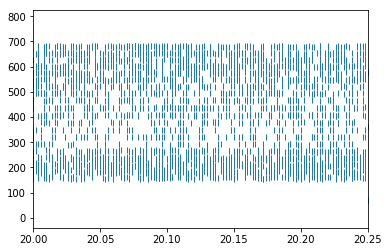

In [13]:
plt.plot(times, indices, '|')
# Add lines to show the repeated stimulation windows
plt.vlines(np.arange(n_repetitions)*repeat_every/second, 0, 784, color='gray')
plt.vlines(np.arange(n_repetitions)*repeat_every/second + pattern_length/second, 0, 784, color='gray')
plt.xlim(20,20.25)
plt.show()

(0, 1)

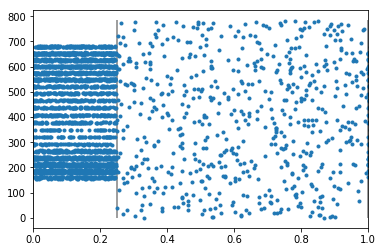

In [213]:
plt.plot(times/second, indices, '.')
# Add lines to show the repeated stimulation windows
plt.vlines(np.arange(n_repetitions)*repeat_every/second, 0, 784, color='gray')
plt.vlines(np.arange(n_repetitions)*repeat_every/second + pattern_length/second, 0, 784, color='gray')
plt.xlim(0,1)

In [15]:
import h5py
f = h5py.File("stdp_weights_100pics.h5")
w = f["weights"][:]
f.close()

In [22]:
M = w.reshape(784,100)

In [24]:
M = M.transpose()

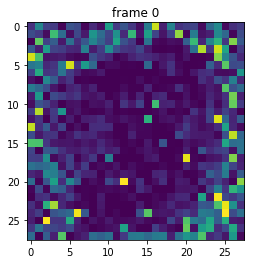

In [26]:
fig, ax = plt.subplots()
for i in range(100):
    ax.cla()
    ax.imshow(M[i].reshape((28,28)))
    ax.set_title("frame {}".format(i))
    # Note that using time.sleep does *not* work here!
    plt.pause(0.1)